Group Members- Rashik Iram Chowdhury (2111336642), Zarin Akter (2011704042) and Md. Mutasim Farhan (2013123642)

# Loading the dataset and adjusting it to our criterion

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("G:\\Assignment\\DT-BrainCancer.csv")
df.head(5)


,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,Female,Meningioma,Infratentorial,90,6.11,0
1,2,Male,HG glioma,Supratentorial,90,19.35,1
2,3,Female,Meningioma,Infratentorial,70,7.95,0
3,4,Female,LG glioma,Supratentorial,80,7.61,1
4,5,Male,HG glioma,Supratentorial,90,5.06,1


In [2]:
df.columns

Index(['Unnamed: 0', 'sex', 'diagnosis', 'loc', 'ki', 'gtv', 'status'], dtype='object')

In [3]:
len(df) #Total Instances/Samples

88

In [4]:
df.isnull().sum()

Unnamed: 0    0
sex           0
diagnosis     1
loc           0
ki            0
gtv           0
status        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   sex         88 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         88 non-null     object 
 4   ki          88 non-null     int64  
 5   gtv         88 non-null     float64
 6   status      88 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.9+ KB


In [6]:
df.dropna(subset=['diagnosis'], inplace=True)
df.isnull().sum()

Unnamed: 0    0
sex           0
diagnosis     0
loc           0
ki            0
gtv           0
status        0
dtype: int64

Now there is no missing value in this dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  87 non-null     int64  
 1   sex         87 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         87 non-null     object 
 4   ki          87 non-null     int64  
 5   gtv         87 non-null     float64
 6   status      87 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.4+ KB


**Handling categorical values or encoding**

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [10]:
df['sex'] = le.fit_transform(df['sex'])
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df['loc'] = le.fit_transform(df['loc'])

In [11]:
df.head(10)

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,0,2,0,90,6.11,0
1,2,1,0,1,90,19.35,1
2,3,0,2,0,70,7.95,0
3,4,0,1,1,80,7.61,1
4,5,1,0,1,90,5.06,1
5,6,0,2,1,80,4.82,0
6,7,1,2,1,80,3.19,0
7,8,1,1,1,80,12.37,0
8,9,0,2,1,70,12.16,0
9,10,1,0,1,100,2.53,0


In [12]:
duplicates = df[df.duplicated(keep='first')]
duplicates

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status


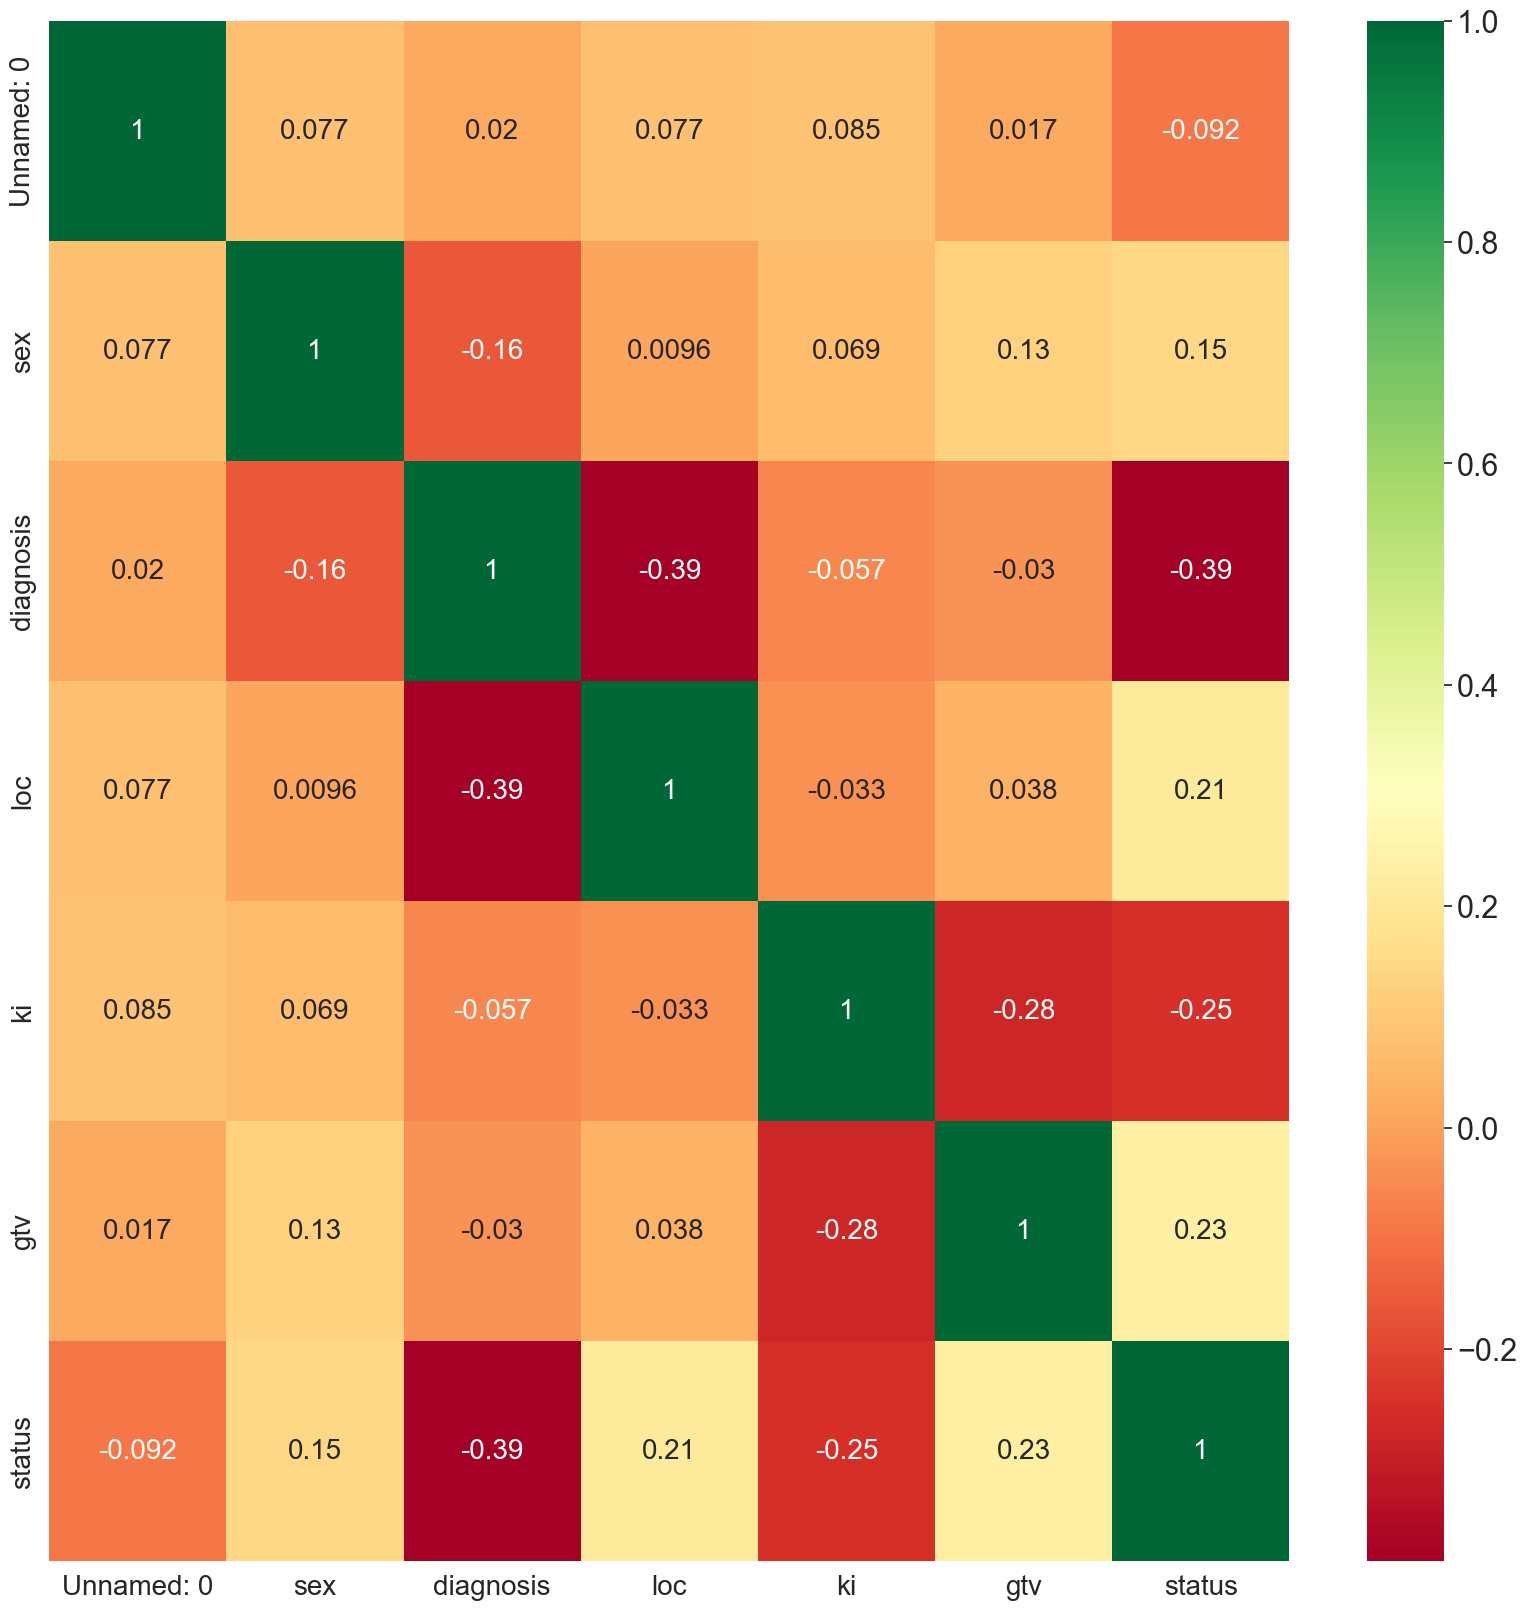

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})   #heatmap
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

<Axes: >

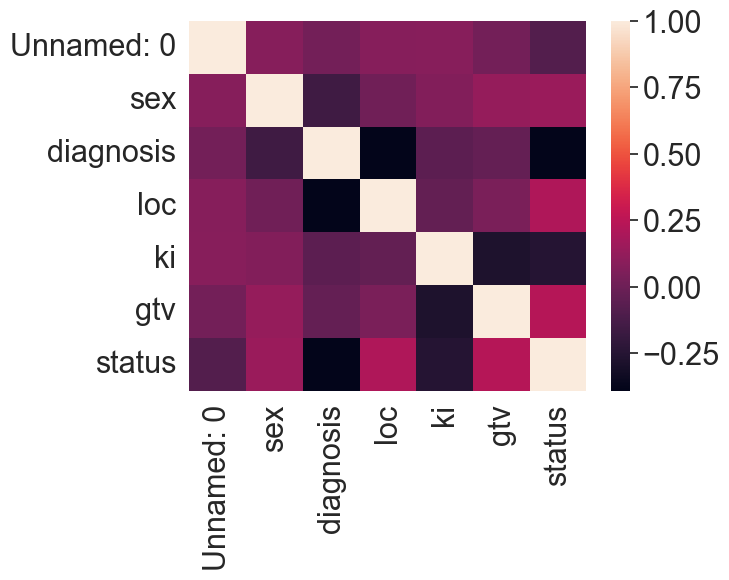

In [14]:
sns.heatmap(df.corr())

In [15]:
X = df.drop(columns=['status'])
y = df['status']

In [16]:
X

,Unnamed: 0,sex,diagnosis,loc,ki,gtv
0,1,0,2,0,90,6.11
1,2,1,0,1,90,19.35
2,3,0,2,0,70,7.95
3,4,0,1,1,80,7.61
4,5,1,0,1,90,5.06
...,...,...,...,...,...,...
83,84,1,0,1,80,0.16
84,85,1,0,1,80,19.81
85,86,1,2,1,90,2.50
86,87,1,2,1,90,2.02


In [17]:
y

0     0
1     1
2     0
3     1
4     1
     ..
83    1
84    1
85    0
86    0
87    0
Name: status, Length: 87, dtype: int64

In [18]:
total_samples = len(X)
train_samples = int(total_samples * 0.70)
valid_samples = int(total_samples * 0.15)

print("Train Samples: ", train_samples)
print("Valid Samples: ", valid_samples)


X_train, y_train = X[:train_samples], y[:train_samples]
X_valid, y_valid = X[train_samples:train_samples+valid_samples], y[train_samples:train_samples+valid_samples]
X_test, y_test = X[train_samples+valid_samples:], y[train_samples+valid_samples:]

print("Total Samples: ", len(X))
print("Training Size: ", len(X_train))
print("Validation Size: ", len(X_valid))
print("Testing Size: ", len(X_test))

Train Samples:  60
Valid Samples:  13
Total Samples:  87
Training Size:  60
Validation Size:  13
Testing Size:  14


# Feature Engineering

In [19]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.fit_transform(X_valid) 
X_test = scaler.fit_transform(X_test)

In [20]:
X_test

array([[-1.61245155,  1.        ,  1.24807544,  0.52223297,  1.74077656,
         1.27114005],
       [-1.36438208, -1.        ,  0.2773501 ,  0.52223297, -0.69631062,
         1.88637802],
       [-1.11631261, -1.        ,  0.2773501 ,  0.52223297, -0.69631062,
        -0.75743373],
       [-0.86824314, -1.        ,  0.2773501 ,  0.52223297,  0.52223297,
        -0.31875014],
       [-0.62017367, -1.        ,  0.2773501 ,  0.52223297,  1.74077656,
        -0.10256111],
       [-0.3721042 , -1.        ,  0.2773501 , -1.91485422, -1.91485422,
        -0.70789041],
       [-0.12403473, -1.        , -1.66410059,  0.52223297, -0.69631062,
         0.41899494],
       [ 0.12403473, -1.        ,  1.24807544,  0.52223297,  0.52223297,
        -0.80877862],
       [ 0.3721042 ,  1.        , -0.69337525, -1.91485422,  0.52223297,
         1.76657326],
       [ 0.62017367,  1.        , -1.66410059,  0.52223297, -0.69631062,
        -0.95830937],
       [ 0.86824314,  1.        , -1.66410059,  0.

In [21]:
def calculate_mse(y, y_pred):
  mse = np.square(np.subtract(y, y_pred)).mean() 
  return mse


In [26]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def evaluate_DecisionTree(maximum_depth, minimum_samples_split):
    model = DecisionTreeClassifier(max_depth=maximum_depth, min_samples_split=minimum_samples_split)
    model.fit(X_train, y_train)

    y_valid_predict = model.predict(X_valid)
    accuracy = np.mean(y_valid_predict == y_valid)

    return accuracy, model

best_accuracy = 0.0
best_depth = None
best_min_samples = None
best_model = None

for depth in range(2, 200):  # Adjust the range as needed
    for min_samples in range(2, 200):  # Adjust the range as needed
        accuracy, model = evaluate_DecisionTree(depth, min_samples)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            best_min_samples = min_samples
            best_model = model

print(f"Best Hyperparameters: max_depth={best_depth}, min_samples_split={best_min_samples}")
print(f"Best Validation Accuracy: {round((best_accuracy*100),2)}")

# Now, let's evaluate the best model on the test dataset
y_test_predict = best_model.predict(X_test)
test_accuracy = np.mean(y_test_predict == y_test)
print(f"Test Accuracy: {round((test_accuracy*100),2)}")


confusion_matrix = np.zeros((len(np.unique(y_test)), len(np.unique(y_test))))
for i in range(len(y_test)):
    confusion_matrix[y_test[i], y_test_predict[i]] += 1
print("Confusion Matrix:")
print(confusion_matrix)


precision = np.zeros(len(np.unique(y_test)))
recall = np.zeros(len(np.unique(y_test)))
f_score = np.zeros(len(np.unique(y_test)))
for i in range(len(np.unique(y_test))):
    true_positive = confusion_matrix[i, i]
    false_positive = np.sum(confusion_matrix[:, i]) - true_positive
    false_negative = np.sum(confusion_matrix[i, :]) - true_positive
    precision[i] = true_positive / (true_positive + false_positive)
    recall[i] = true_positive / (true_positive + false_negative)
    f_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)


precision_recall_curve = []
for threshold in np.linspace(0, 1, 100):
    true_positive = np.sum(y_test_predict[y_test == 1] >= threshold)
    false_positive = np.sum(y_test_predict[y_test == 0] >= threshold)
    false_negative = np.sum(y_test_predict[y_test == 1] < threshold)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    precision_recall_curve.append((precision, recall))
print("Precision-Recall Curve Points:", precision_recall_curve)


Best Hyperparameters: max_depth=2, min_samples_split=19
Best Validation Accuracy: 84.62
Test Accuracy: 78.57
Confusion Matrix:
[[8. 3.]
 [0. 3.]]
Precision: [1.  0.5]
Recall: [0.72727273 1.        ]
F-score: [0.84210526 0.66666667]
Precision-Recall Curve Points: [(0.21428571428571427, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), 

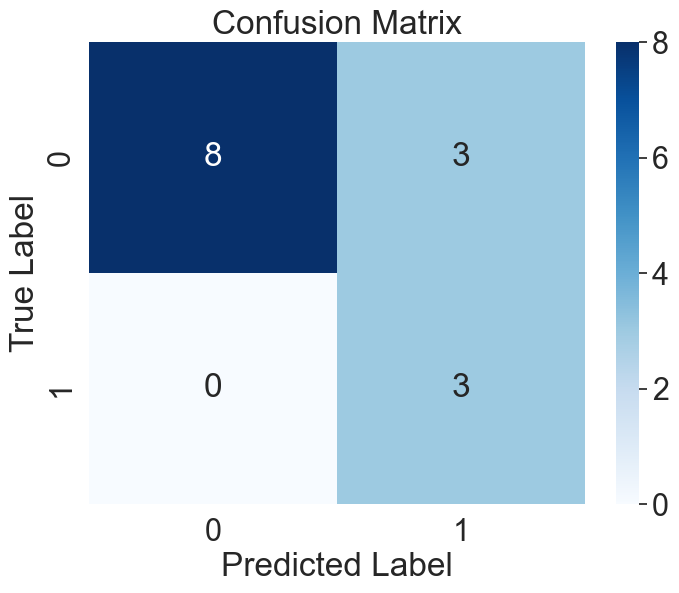

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [35]:
precision_recall_curve = []
for threshold in np.linspace(0, 1, 100):
    true_positive = np.sum((y_test_predict == 1) & (y_test >= threshold))
    false_positive = np.sum((y_test_predict == 1) & (y_test < threshold))
    false_negative = np.sum((y_test_predict == 0) & (y_test >= threshold))
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    precision_recall_curve.append((precision, recall))
print("Precision-Recall Curve Points:", precision_recall_curve)


Precision-Recall Curve Points: [(1.0, 0.42857142857142855), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5

In [34]:
precision_recall_curve = []
for threshold in np.linspace(0, 1, 100):
    true_positive = np.sum((y_test_predict == 1) & (y_test >= threshold))
    false_positive = np.sum((y_test_predict == 1) & (y_test < threshold))
    false_negative = np.sum((y_test_predict == 0) & (y_test >= threshold))
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    precision_recall_curve.append((precision, recall))
print("Precision-Recall Curve Points:", precision_recall_curve)


Precision-Recall Curve Points: [(1.0, 0.42857142857142855), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5, 1.0), (0.5

In [36]:
from sklearn.metrics import plot_precision_recall_curve

# Plot Precision-Recall Curve
plot_precision_recall_curve(best_model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\Users\User\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\__init__.py)

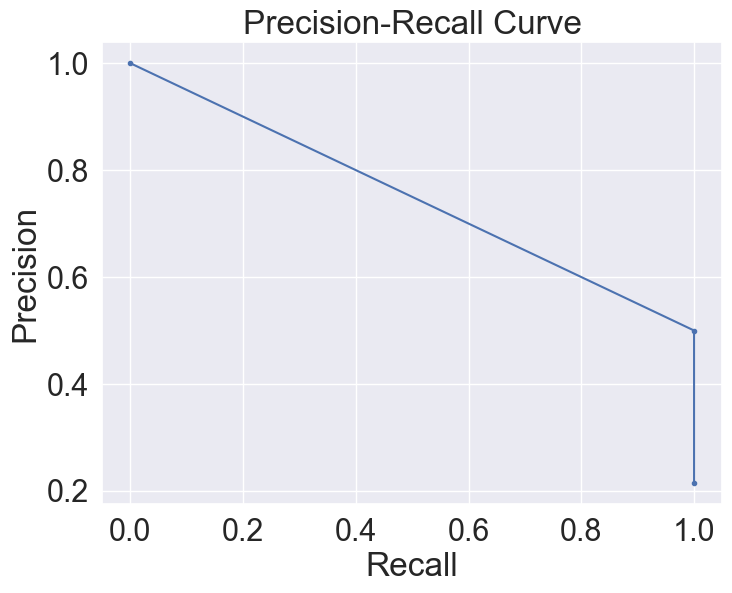

Area Under Precision-Recall Curve: 0.75


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc


# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predict)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Compute Area Under Curve (AUC) for Precision-Recall Curve
pr_auc = auc(recall, precision)
print(f"Area Under Precision-Recall Curve: {pr_auc}")
